In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


MovieWriter imagemagick unavailable; using Pillow instead.


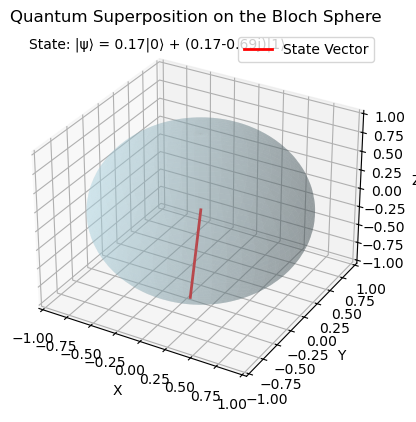

Measurement Result: |1⟩


In [2]:

# Initialize the quantum state coefficients
c1 = 1 / np.sqrt(2)  # Coefficient for |0⟩
c2 = 1 / np.sqrt(2)  # Coefficient for |1⟩

# Probability of each state
prob_0 = abs(c1)**2
prob_1 = abs(c2)**2

# Bloch sphere coordinates for the superposition state
def bloch_coords(c1, c2):
    theta = 2 * np.arccos(np.abs(c1))  # Polar angle
    phi = np.angle(c2) - np.angle(c1)  # Azimuthal angle
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

# Prepare Bloch sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Quantum Superposition on the Bloch Sphere")

# Draw sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color="lightblue", alpha=0.3)

# State vector
state_vector, = ax.plot([], [], [], "r-", label="State Vector", linewidth=2)

# Measurement outcome display
measurement_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes)

# Animation update function
def update(frame):
    global c1, c2
    t = frame / 20.0  # Time parameter
    
    # Rotate the state vector on the Bloch sphere
    c1 = np.cos(t) / np.sqrt(2)
    c2 = np.exp(1j * t) / np.sqrt(2)
    bx, by, bz = bloch_coords(c1, c2)
    state_vector.set_data([0, bx], [0, by])
    state_vector.set_3d_properties([0, bz])
    measurement_text.set_text(f"State: |ψ⟩ = {np.round(c1, 2)}|0⟩ + {np.round(c2, 2)}|1⟩")
    return state_vector, measurement_text

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=False)

# Save the animation as a GIF (optional)
ani.save('Quantum_superposition.gif', writer='imagemagick')

plt.legend()
plt.show()

# Simulate measurement
measurement = np.random.choice([0, 1], p=[prob_0, prob_1])
print(f"Measurement Result: {'|0⟩' if measurement == 0 else '|1⟩'}")
